## Gradient梯度

### <font color="red">在微積分裡⾯，對多元函數的參數求 ∂ 偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。</font>

比如函數 f(x), 對 x 求偏導數，求得的梯度向量就是 (∂f/∂x)，簡稱 grad f(x) 或者 ▽f (x)

## 最常⽤的優化算法 -梯度下降

### <font color="red">⽬的：沿著⽬標函數梯度下降的⽅向搜索極⼩值（也可以沿著梯度上升的⽅向搜索極⼤值）</font>

    要計算 Gradient Descent，考慮
    • Loss = 實際 ydata – 預測 ydata
    •      = w* 實際 xdata – w*預測 xdata (bias 為 init value，被消除)
    • Gradient = ▽f (θ) (Gradient = ∂L/∂w)
    • 調整後的權重 = 原權重 – η(Learning rate) * Gradient
    
    w <- w - η  ∂L/∂w

## 梯度下降的算法調優

    使⽤ momentum (動量) 是梯度下降法中⼀種常⽤的加速技術。
    x ← x − α ∗ dx (x沿負梯度⽅向下降)
    v = ß ∗ v − a ∗ d x
    x ← x + v
    
<font color="red">其中 ß 即 momentum 係數，通俗的理解上⾯式⼦就是，如果上⼀次的
momentum（即ß ）與這⼀次的負梯度⽅向是相同的，那這次下降的幅度就會加⼤，所以這樣做能夠達到加速收斂的過程</font>

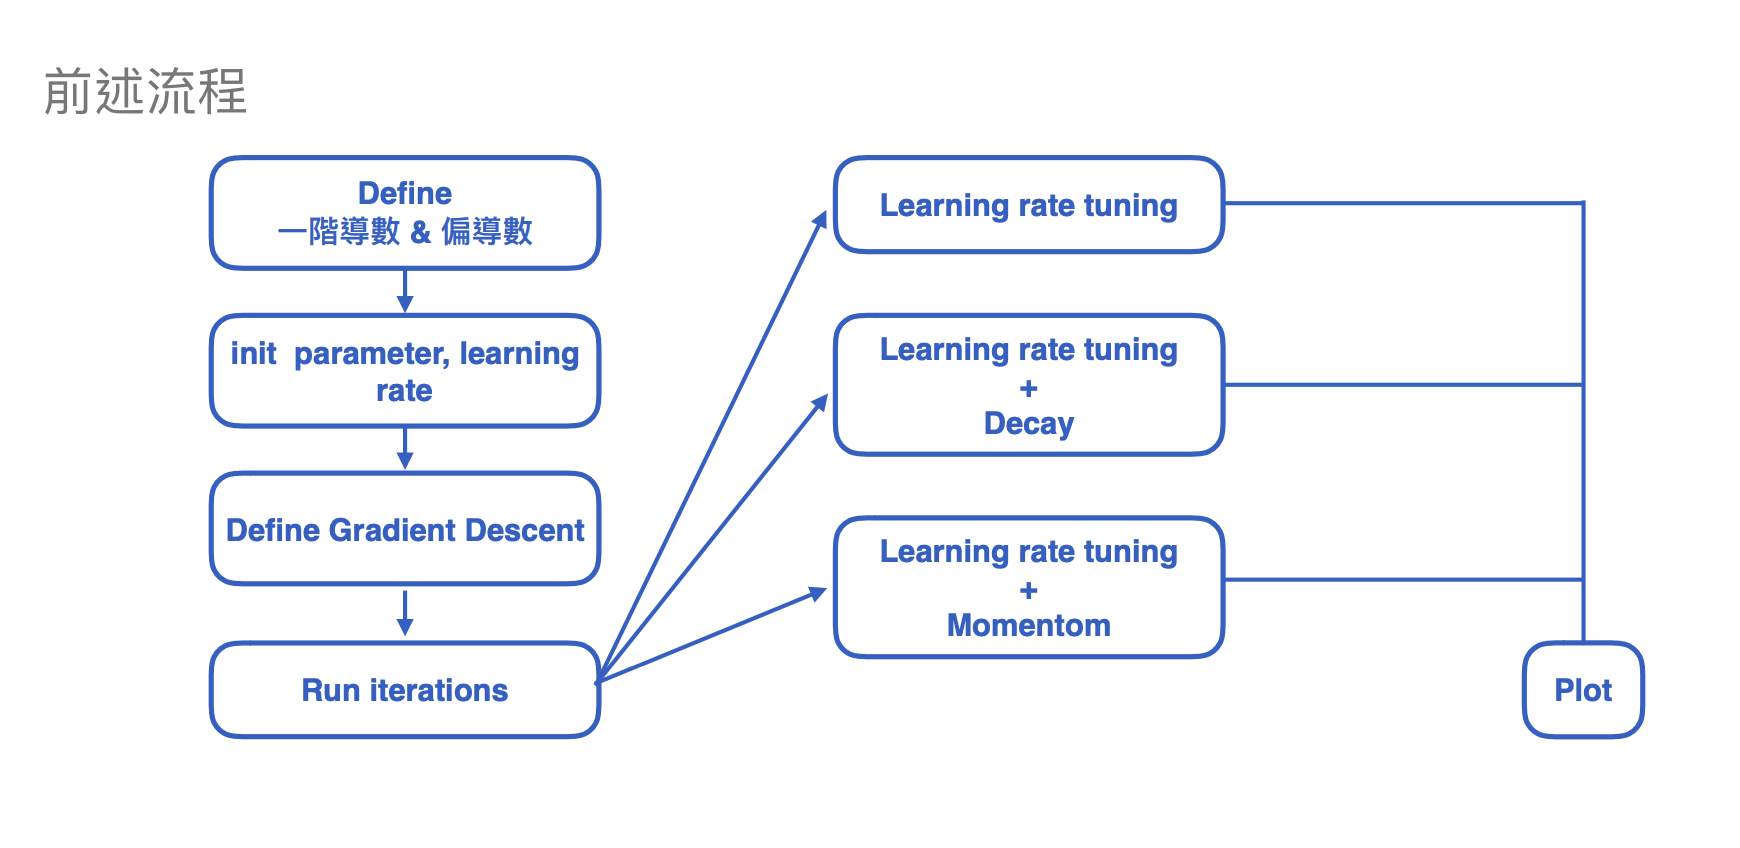

## <font color="red">avoid local minimum</font>

> • Item-1：<font color="red">在訓練神經網絡的時候，通常在訓練剛開始的時候使⽤較⼤的learning rate，隨著訓練的進⾏，我們會慢慢的減⼩ learning rate</font>

    • 學習率較⼩時，收斂到極值的速度較慢。
    • 學習率較⼤時，容易在搜索過程中發⽣震盪

> • Item-2：<font color="red">隨著 iteration 改變 Learning</font> - decay

    • 衰減越⼤，學習率衰減地越快。 衰減確實能夠對震盪起到減緩的作⽤
    
> • Item-3：<font color="red">momentum(動量)</font>

    • 如果上⼀次的 momentum 與這⼀次的負梯度⽅向是相同的，那這次下
    降的幅度就會加⼤，所以這樣做能夠達到加速收斂的過程
    • 如果上⼀次的 momentum 與這⼀次的負梯度⽅向是相反的，那這次下
    降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程

## 課程目標:

利用神經網路的加法減法數學式來說明梯度下降

## 範例重點:

透過網路參數(w, b)的更新可以更容易理解梯度下降的求值過程

matplotlib: 載入繪圖的工具包 random, numpy: 載入數學運算的工具包

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果
import random as random
import numpy as np
import csv

### ydata = b + w * xdata

給定曲線的曲線範圍

In [2]:
# 給定初始的data
x_data = [ 338., 333., 328., 207., 226., 25., 179.,  60., 208.,  606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193.,  66., 226., 1591.]

In [3]:
# 給定神經網路參數:bias 跟weight
x = np.arange(-200,-100,1) #給定bias
y = np.arange(-5,5,0.1) #給定weight

In [4]:
Z =  np.zeros((len(x), len(y)))
# meshgrid 返回的兩個矩陣X、Y必定是行數、列數相等的，且X、Y的行數都等
# meshgrid 函數用兩個坐標軸上的點在平面上畫格。
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)

In [5]:
# ydata = b + w * xdata 
b = -120 # initial b
w = -4 # initial w
lr = 0.000001 # learning rate
iteration = 100000

# Store initial values for plotting.
b_history = [b]
w_history = [w]

#給定初始值
lr_b = 0.0
lr_w = 0.0

在微積分裡面，對多元函數的參數求∂偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。 

比如函數f(x), 對x求偏導數，求得的梯度向量就是(∂f/∂x),簡稱grad f(x)或者▽f (x)。

In [6]:
'''
Loss = (實際ydata – 預測ydata)
Gradient = -2*input * Loss 
調整後的權重 = 原權重 – Learning * Gradient
'''
# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # Update parameters.
    b = b - lr * b_grad 
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

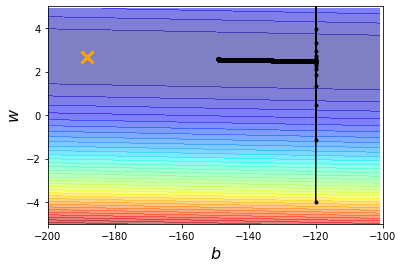

In [7]:
# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

## 課程目標:

利用神經網路的加法減法數學式來說明梯度下降

## 範例重點:

透過網路參數(w, b)的更新可以更容易理解梯度下降的求值過程

## 梯度 Gradient

在微積分裡面，對多元函數的參數求∂偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。

比如函數f(x), 對x求偏導數，求得的梯度向量就是(∂f/∂x),簡稱grad f(x)或者▽f (x)


## 梯度下降法

給定起始點與目標函數的一階導函數(偏導數)，求在epochs次迭代中x的更新值

y = w*x (為了計算方便, 假設 w=x), 所以 y=(x)^2,

func(x) = y=(x)^2

一階導函數: dy/dw=2*x, df = dy/dw

v表示w要改變的幅度v = - (dL/dw)* lr

w <-- w + v (w <-- w-lr*df)

考慮bias: y = b + w*x (set b=0)

[3.         2.88       2.7624     2.647152   2.53420896 2.42352478
 2.31505429 2.2087532  2.10457814 2.00248657 1.90243684 1.8043881
 1.70830034 1.61413434 1.52185165 1.43141462 1.34278632 1.2559306
 1.17081199 1.08739575 1.00564783]


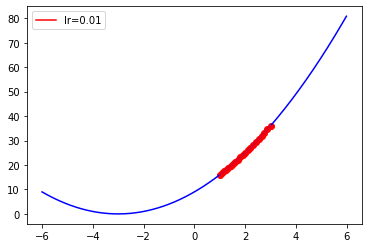

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 目標函數:y=(x+3)^2
def func(x): 
    return np.square(x+3)

# 目標函數一階導數:dy/dx=2*(x+3)
def dfunc(x): 
    return 2 * (x+3)

def GD(w_init, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param w_init: w的init value    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置   
     """    
    xs = np.zeros(epochs+1) # 把 "epochs+1" 轉成dtype=np.float32    
    x = w_init    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要跨出的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# 起始權重
w_init = 3    
# 執行週期數
epochs = 20 
# 學習率   
#lr = 0.3
lr = 0.01
# 梯度下降法 
x = GD(w_init, dfunc, epochs, lr=lr) 
print (x)

#劃出曲線圖
color = 'r'    
 
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()

## 學習率對梯度下降法的影響

學習率較小時，收斂到正確結果的速度較慢。 

學習率較大時，容易在搜索過程中發生震盪。

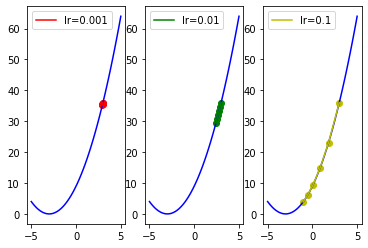

In [9]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Learning Rate')

w_init = 3
epochs = 5
x = w_init
lr = [0.001, 0.01, 0.1]

color = ['r', 'g', 'y']
size = np.ones(epochs+1) * 10
size[-1] = 70
for i in range(len(lr)):
    x = GD(w_init, dfunc, epochs, lr=lr[i])
    plt.subplot(1, 3, i+1)
    plt.plot(line_x, line_y, c='b')
    plt.plot(x, func(x), c=color[i], label='lr={}'.format(lr[i]))
    plt.scatter(x, func(x), c=color[i])
    plt.legend()
plt.show()

## Result

1. <font color="red"> 學習率較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了</font> 



2. <font color="red"> 如果讓能夠lr隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪學習率衰減因子由此誕生</font>


## 學習率衰減公式

lr_i = lr_start 1.0 / (1.0 + decay i)

其中lr_i為第一迭代i時的學習率，lr_start為原始學習率，decay為一個介於[0.0, 1.0]的小數。從公式上可看出：

decay越小，學習率衰減地越慢，當decay = 0時，學習率保持不變。 decay越大，學習率衰減地越快，當decay = 1時，學習率衰減最快

In [10]:
def GD_decay(w_init, df, epochs, lr, decay):
    xs = np.zeros(epochs+1)
    x = w_init
    xs[0] = x
    v = 0
    for i in range(epochs):
        dx = df(x)
        # 學習率衰減 
        lr_i = lr * 1.0 / (1.0 + decay * i)
        # v表示x要改变的幅度
        v = - dx * lr_i
        x += v
        xs[i+1] = x
    return xs

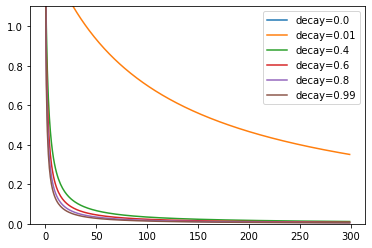

In [11]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

lr = 1.4
iterations = np.arange(300)
decay = [0.0, 0.01, 0.4, 0.6, 0.8, 0.99]
for i in range(len(decay)):
    decay_lr = lr * (1.0 / (1.0 + decay[i] * iterations))
    plt.plot(iterations, decay_lr, label='decay={}'.format(decay[i]))

plt.ylim([0, 1.1])
plt.legend(loc='best')
plt.show()

## Result

衰減越大，學習率衰減地越快。衰減確實能夠對震盪起到減緩的作用

## Momentum (動量)

如何用“動量”來解決:

(1)學習率較小時，收斂到極值的速度較慢。

(2)學習率較大時，容易在搜索過程中發生震盪。

當使用動量時，則把每次w的更新量v考慮為本次的梯度下降量 (-dx*lr), 與上次w的更新量v乘上一個介於[0, 1]的因子momentum的和

w ← x − α ∗ dw (x沿負梯度方向下降)

v = ß ∗ v − α ∗ d w

w ← w + v

1. <font color="red">(ß 即momentum係數，通俗的理解上面式子就是，如果上一次的momentum（即ß ）與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程</font>



2. <font color="red">如果上一次的momentum（即ß ）與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程</font>

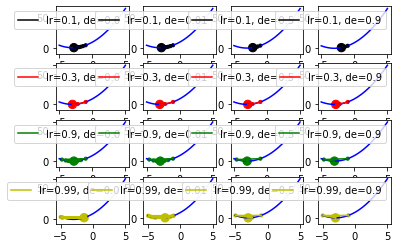

In [12]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

x_start = -1
epochs = 10

lr = [0.1, 0.3, 0.9, 0.99]
decay = [0.0, 0.01, 0.5, 0.9]

color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)
size = np.ones(epochs + 1) * 10
size[-1] = 70
for i in range(row):
     for j in range(col):
        x = GD_decay(x_start, dfunc, epochs, lr=lr[i], decay=decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}, de={}'.format(lr[i], decay[j]))
        plt.scatter(x, func(x), c=color[i], s=size)
        plt.legend(loc=0)
plt.show()

## 作業目標:

了解數學式與利用超參數調整求導梯度下降的過程


## 作業重點:

(1)dfunc 是 func 偏微分的公式，X^2 偏微分等於 2 * X，可以同時改變 func、dfunc 內容

(2)調整其它 Hyperparameters: w_init、epochs、lr、decay、momentom測試逼近的過程

In [13]:
import numpy as np
import matplotlib.pyplot as plt

'''
# 目標函數:y=(x+5)^2

# 目標函數一階導數:dy/dx=2*(x+5)

'''

# 目標函數:y=(x+5)^2
def func(x):
    return np.square(x+5)

# 目標函數一階導數:dy/dx=2*(x+5)
def dfunc(x):
    return 2*(x+5)

[ 3.         -1.8        -3.72       -4.488      -4.7952     -4.91808
 -4.967232   -4.9868928  -4.99475712 -4.99790285 -4.99916114 -4.99966446
 -4.99986578 -4.99994631 -4.99997853 -4.99999141 -4.99999656 -4.99999863
 -4.99999945 -4.99999978 -4.99999991]


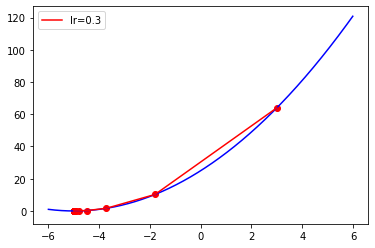

In [14]:
def GD(w_init, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param w_init: w的init value    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置   
     """    
    xs = np.zeros(epochs+1) # 把 "epochs+1" 轉成dtype=np.float32    
    x = w_init    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要跨出的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# 起始權重
w_init = 3    
# 執行週期數
epochs = 20 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = GD(w_init, dfunc, epochs, lr=lr) 
print (x)

#劃出曲線圖
color = 'r'    
 
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()

## 學習率對梯度下降法的影響

學習率較小時，收斂到正確結果的速度較慢。 

學習率較大時，容易在搜索過程中發生震盪。

In [15]:
w_init

3

In [16]:
def check_weight_init(weight_init) :
    line_x = np.linspace(-5, 5, 100)
    line_y = func(line_x)
    plt.figure('Gradient Desent: Learning Rate')

    '''
    w_init
    epochs 
    x = w_init
    lr = [........]
    '''
    # 權重
    w_init = weight_init # 起始權重
    x = w_init

    epochs = 10
#     epochs = 5

    lr = [0.1, 0.3, 0.95]


    color = ['r', 'g', 'y']
    size = np.ones(epochs+1) * 10
    size[-1] = 70
    for i in range(len(lr)):
        x = GD(w_init, dfunc, epochs, lr=lr[i])
        plt.subplot(1, 3, i+1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}'.format(lr[i]))
        plt.scatter(x, func(x), c=color[i])
        plt.legend()
    plt.show()

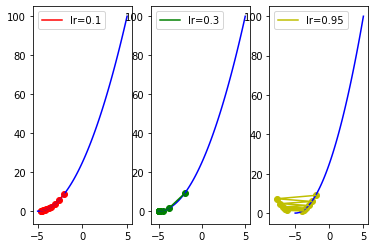

In [17]:
check_weight_init(-2)

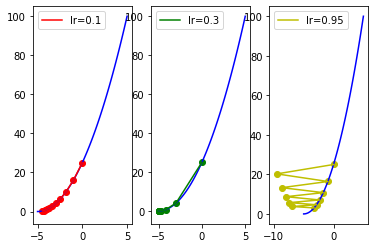

In [18]:
check_weight_init(0)

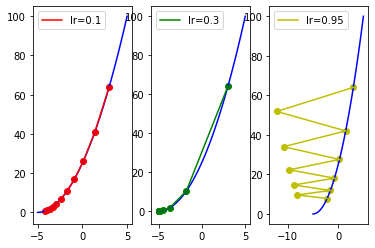

In [19]:
check_weight_init(3)

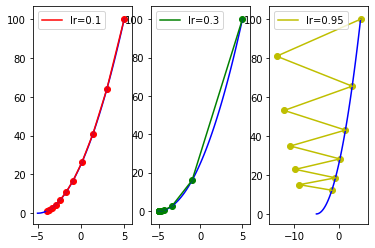

In [20]:
check_weight_init(5)

## Result

學習率較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了 

如果讓能夠lr隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪學習率衰減因子由此誕生

## 學習率衰減公式

lr_i = lr_start 1.0 / (1.0 + decay i)

其中lr_i為第一迭代i時的學習率，lr_start為原始學習率，decay為一個介於[0.0, 1.0]的小數。從公式上可看出：

decay越小，學習率衰減地越慢，當decay = 0時，學習率保持不變。 decay越大，學習率衰減地越快，當decay = 1時，學習率衰減最快

In [21]:
def GD_decay(w_init, df, epochs, lr, decay):
    xs = np.zeros(epochs+1)
    x = w_init
    xs[0] = x
    v = 0
    for i in range(epochs):
        dx = df(x)
        # 學習率衰減 
        lr_i = lr * 1.0 / (1.0 + decay * i)
        # v表示x要改变的幅度
        v = - dx * lr_i
        x += v
        xs[i+1] = x
    return xs

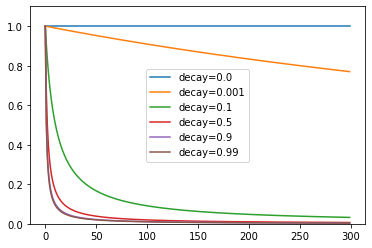

In [22]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

lr = 1.0
iterations = np.arange(300)
decay = [0.0, 0.001, 0.1, 0.5, 0.9, 0.99]
for i in range(len(decay)):
    decay_lr = lr * (1.0 / (1.0 + decay[i] * iterations))
    plt.plot(iterations, decay_lr, label='decay={}'.format(decay[i]))

plt.ylim([0, 1.1])
plt.legend(loc='best')
plt.show()

## Result

衰減越大，學習率衰減地越快。 衰減確實能夠對震盪起到減緩的作用

## Momentum (動量)

如何用“動量”來解決:

(1)學習率較小時，收斂到極值的速度較慢。

(2)學習率較大時，容易在搜索過程中發生震盪。

當使用動量時，則把每次w的更新量v考慮為本次的梯度下降量 (-dx*lr), 與上次w的更新量v乘上一個介於[0, 1]的因子momentum的和

w ← x − α ∗ dw (x沿負梯度方向下降)

v = ß ∗ v − α ∗ d w

w ← w + v

(ß 即momentum係數，通俗的理解上面式子就是，如果上一次的momentum（即ß ）與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程

如果上一次的momentum（即ß ）與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程

In [23]:
w_init

3

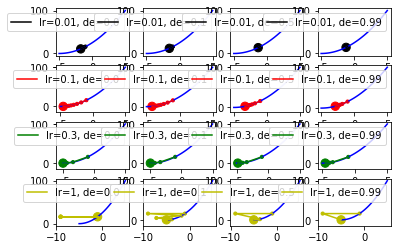

In [24]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

'''
x= w_init
epochs = 10

lr = [.......]
decay = [.......]
'''

x = w_init
epochs = 10

lr = [0.01, 0.1, 0.3, 1]
decay = [0.0, 0.1, 0.5, 0.99]


color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)
size = np.ones(epochs + 1) * 10
size[-1] = 70
for i in range(row):
     for j in range(col):
        x = GD_decay(x_start, dfunc, epochs, lr=lr[i], decay=decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}, de={}'.format(lr[i], decay[j]))
        plt.scatter(x, func(x), c=color[i], s=size)
        plt.legend(loc=0)
plt.show()

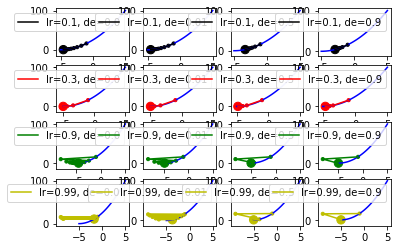

In [25]:
line_x = np.linspace(-5, 5, 100)
line_y = func(line_x)
plt.figure('Gradient Desent: Decay')

x_start = -1
epochs = 10

lr = [0.1, 0.3, 0.9, 0.99]
decay = [0.0, 0.01, 0.5, 0.9]

color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)
size = np.ones(epochs + 1) * 10
size[-1] = 70
for i in range(row):
     for j in range(col):
        x = GD_decay(x_start, dfunc, epochs, lr=lr[i], decay=decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, c='b')
        plt.plot(x, func(x), c=color[i], label='lr={}, de={}'.format(lr[i], decay[j]))
        plt.scatter(x, func(x), c=color[i], s=size)
        plt.legend(loc=0)
plt.show()

## 參考資料


## [機器學習-梯度下降法](https://www.jianshu.com/p/31740cd2ca48?utm_campaign=maleskine&utm_content=note&utm_medium=seo_notes&utm_source=recommendation)

我們程序也需要一個機制去評估我們θ是否比較好，所以說需要對我們做出的h函數進行評估，一般這個函數稱為損失函數（loss function）或者錯誤函數(error function)，描述h函數不好的程度，在下面，我們稱這個函數為J函數

### <font color="red">--> 需要一個機制去評估我們θ是否比較好，需要對我們做出的h函數進行評估．描述h函數不好的程度，稱為損失函數（loss function）</font>

### 梯度下降法的一般步驟
![img1]https://upload-images.jianshu.io/upload_images/4155986-8adea932a06d1725.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1000/format/webp

### 梯度下降法的類型

> ### 1. 批次梯度下降(Batch gradient descent)

![img2](https://upload-images.jianshu.io/upload_images/4155986-1cfdfed622240713.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/290/format/webp)


> ### 2. 隨機梯度下降(Stochastic gradient descent)

![img2](https://upload-images.jianshu.io/upload_images/4155986-2c120a994652a0e5.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/366/format/webp)

> <font color="red">隨機梯度下降最大的缺點在於每次更新可能並不會按照正確的方向進行，因此可以帶來優化波動(擾動)</font>，如下圖：
> ![img3](https://upload-images.jianshu.io/upload_images/4155986-2c6382aed1187926.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/484/format/webp)
> <font color="red">不過從另一個方面來看，隨機梯度下降所帶來的波動有個好處就是，對於類似盆地區域（即很多局部極小值點）那麼這個波動的特點可能會使得優化的方向從當前的局部極小值點跳到另一個更好的局部極小值點，這樣便可能對於非凸函數，最終收斂於一個較好的局部極值點</font>，甚至全局極值點。
由於波動，因此會使得迭代次數（學習次數）增多，即收斂速度變慢。不過最終其會和全量梯度下降算法一樣，具有相同的收斂性，即凸函數收斂於全局極值點，非凸損失函數收斂於局部極值點。


> ### 3. 小批量梯度下降(Mini-batch gradient descent)

Mini-batch梯度下降綜合了batch梯度下降與stochastic梯度下降，在每次更新速度與更新次數中間取得一個平衡，其每次更新從訓練集中隨機選擇m,m<n個樣本進行學習

> ![img4](https://upload-images.jianshu.io/upload_images/4155986-324a190f4b66cd13.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/474/format/webp)

> 相對於隨機梯度下降，Mini-batch梯度下降降低了收斂波動性，即降低了參數更新的方差，使得更新更加穩定。

> 相對於批次梯度下降，其提高了每次學習的速度。並且其不用擔心內存瓶頸從而可以利用矩陣運算進行高效計算。




## 梯度下降法的挑戰

    雖然梯度下降算法效果很好，並且廣泛使用，但同時其也存在一些挑戰與問題需要解決：
    
    1. 選擇一個合理的學習速率很難。如果學習速率過小，則會導致收斂速度很慢。如果學習速率過大，那麼其會阻礙收斂，即在極值點附近會振盪。
    
    2. 學習速率調整(又稱學習速率調度，Learning rate schedules)[11]試圖在每次更新過程中，改變學習速率，如退火。一般使用某種事先設定的策        略或者在每次迭代中衰減一個較小的閾值。無論哪種調整方法，都需要事先進行固定設置，這邊便無法自適應每次學習的數據集特點。
    
    3. 模型所有的參數每次更新都是使用相同的學習速率。如果數據特徵是稀疏的或者每個特徵有著不同的取值統計特徵與空間，那麼便不能在每次更新中每        個參數使用相同的學習速率，那些很少出現的特徵應該使用一個相對較大的學習速率。
    
<font color="red">    4. 對於非凸目標函數，容易陷入那些次優的局部極值點中，如在神經網路中。那麼如何避免呢。Dauphin指出更嚴重的問題不是局部極值點，而是鞍點          (These saddle points are usually surrounded by a plateau of the same error, which makes it notoriously hard for        SGD to escape, as the gradient is close to zero in all dimensions .)</font>







--

## [gradient descent using python and numpy](https://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy)

--

## [梯度下降算法的參數更新公式](https://blog.csdn.net/hrkxhll/article/details/80395033)

但是說到底， Δ  的絕對值只是個關於Y的變化率，本質上和 $\theta_t $ 沒關係。所以為了抹去 Δ 在幅度上對 $\theta_t$ 的影響，需要一個學習率來控制：α ∈ (0,1]。所以有了：

$$ \theta_{t+1}=\theta_t+(-\alpha\Delta)=\theta_t-\alpha\Delta $$

而這裡的 Δ 就是你1式中的那個偏導，而對於2式，就是有多少個參數，就有多少個不同的 Δ 。

現在分析在梯度下降法中最常聽到的一句話：<font color="red">「梯度下降法就是朝著梯度的反方向迭代地調整參數直到收斂。」</font>這裡的梯度就是 Δ ,而梯度的反方向就是- Δ 的符號方向-- -梯度實際上是個向量。所以這個角度來說，即使我們只有一個參數需要調整，也可以認為它是個一維的向量。<font color="red">整個過程你可以想像自己站在一個山坡上，準備走到山腳下（最小值的地方），於是很自然地你會考慮朝著哪個方向走，方向由 - Δ 的方向給出，而至於一次走多遠，由|α Δ |來控制。這種方式相信你應該能理解其只能找到局部最小值，而不是全局的。</font>

--


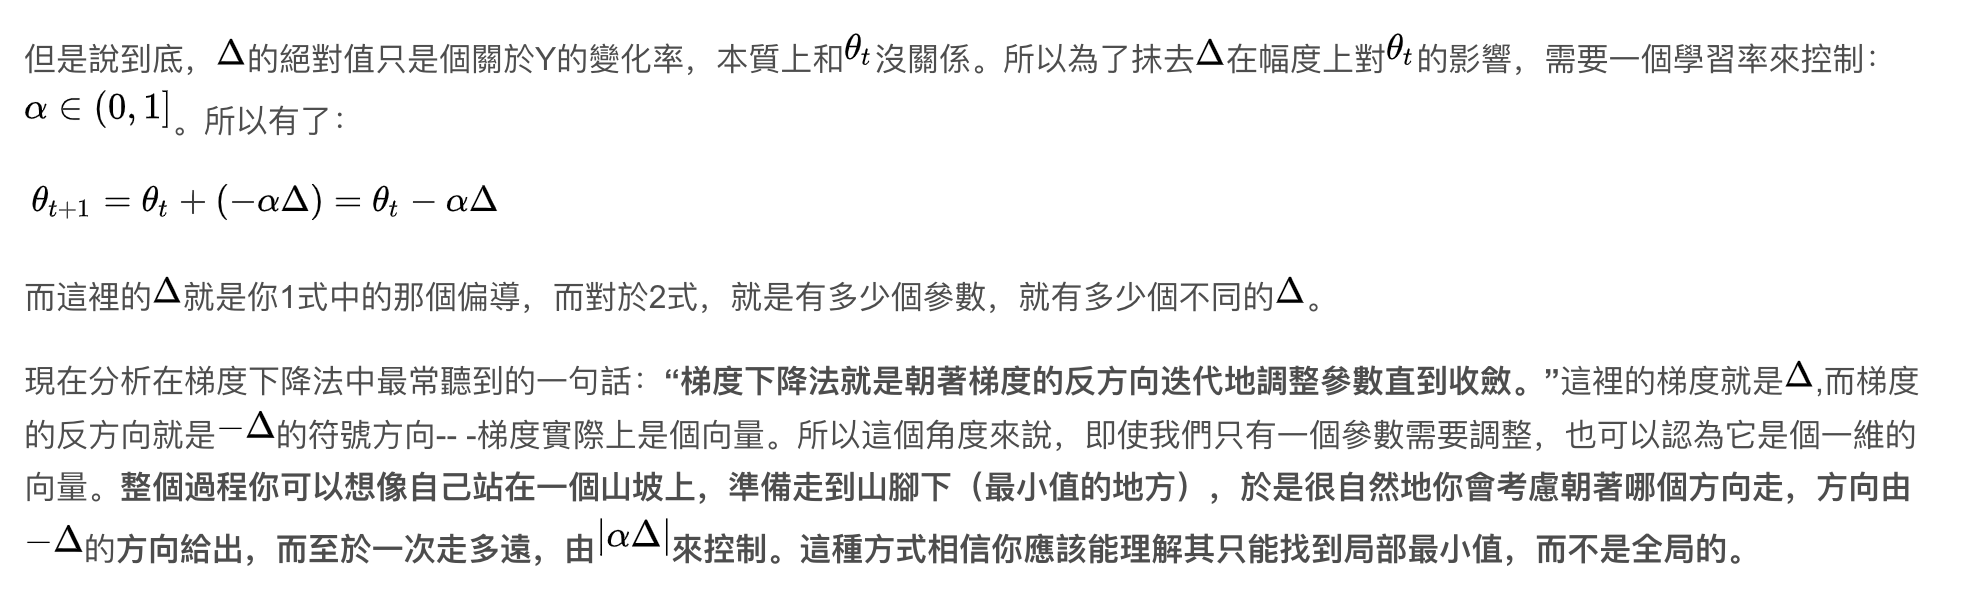

$$ \alpha\Delta $$